In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.ensemble import AdaBoostClassifier



Reading the train and test csv files.

In [ ]:
train_df = pd.read_csv('/content/train_set.csv')
test_df = pd.read_csv('/content/test_set.csv')

# EDA

In [ ]:
num_rows, num_cols = train_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 70000
Number of columns: 28


In [ ]:
train_df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [ ]:
train_df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
train_df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,70000.000000,70000.000000,70000.000000,70000.00000,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,80779.465057,25950.636700,4.497343,33.27990,5.003604e+08,50480.160439,4195.830734,5.369971,5.536771,14.552471,...,21.059857,13.300557,10.490027,5.802886,1426.611851,32.285372,221.020214,107.425309,55.120294,392.625242
std,43225.942103,14350.337976,2.286472,10.77359,2.911527e+08,38375.554706,3192.774574,2.595301,2.067419,8.749310,...,14.815379,6.230288,6.609701,3.867851,1155.679875,5.114936,99.526463,130.888479,39.045155,202.251999
min,5634.000000,1006.000000,1.000000,14.00000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43389.250000,13616.000000,3.000000,24.00000,2.443929e+08,19287.516250,1622.209167,3.000000,4.000000,7.000000,...,10.000000,9.000000,5.400000,3.000000,568.590000,28.028629,144.000000,29.294017,28.027069,267.391375
50%,80937.500000,25709.500000,4.000000,33.00000,5.000637e+08,36938.820000,3081.902500,6.000000,5.000000,13.000000,...,18.000000,14.000000,9.410000,5.000000,1164.700000,32.330840,219.000000,66.378401,45.127125,333.179018
75%,118117.500000,38414.000000,6.000000,42.00000,7.560027e+08,71678.542500,5967.930000,7.000000,7.000000,20.000000,...,28.000000,18.000000,14.900000,9.000000,1945.190000,36.485926,301.000000,147.220773,71.175522,463.411588
max,155628.000000,50999.000000,8.000000,56.00000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.000000,...,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


In [ ]:
train_df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,70000,70000,70000,70000,70000,70000,70000
unique,10127,15,6261,3,3,6,3
top,Stevex,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,36,4887,7945,32091,36688,20075,37080


# Data Analysis

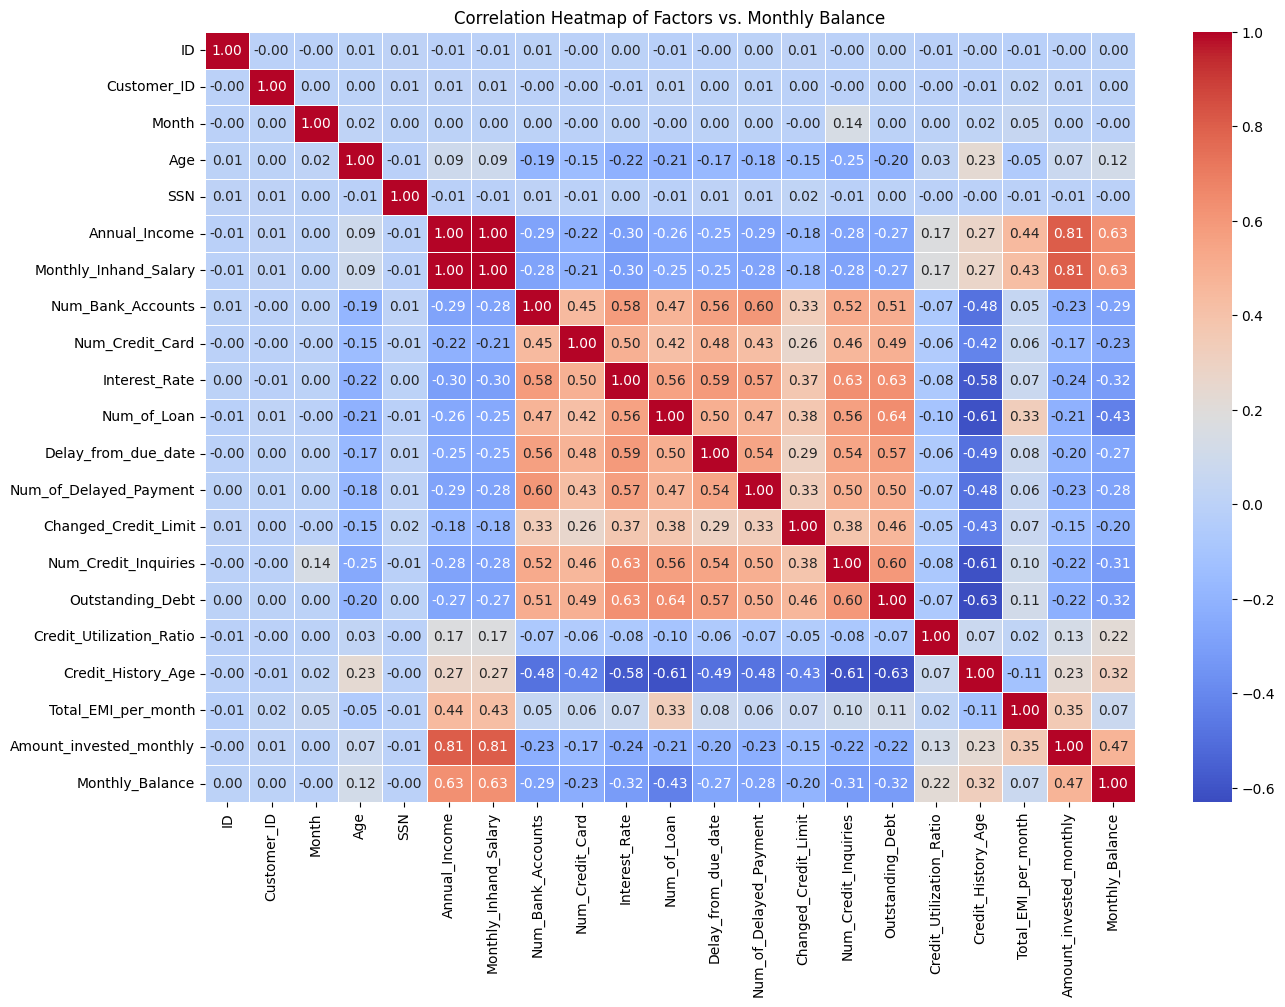

In [ ]:
selected_columns = train_df.select_dtypes(include=['number'])

correlation_matrix = selected_columns.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Factors vs. Monthly Balance')
plt.show()

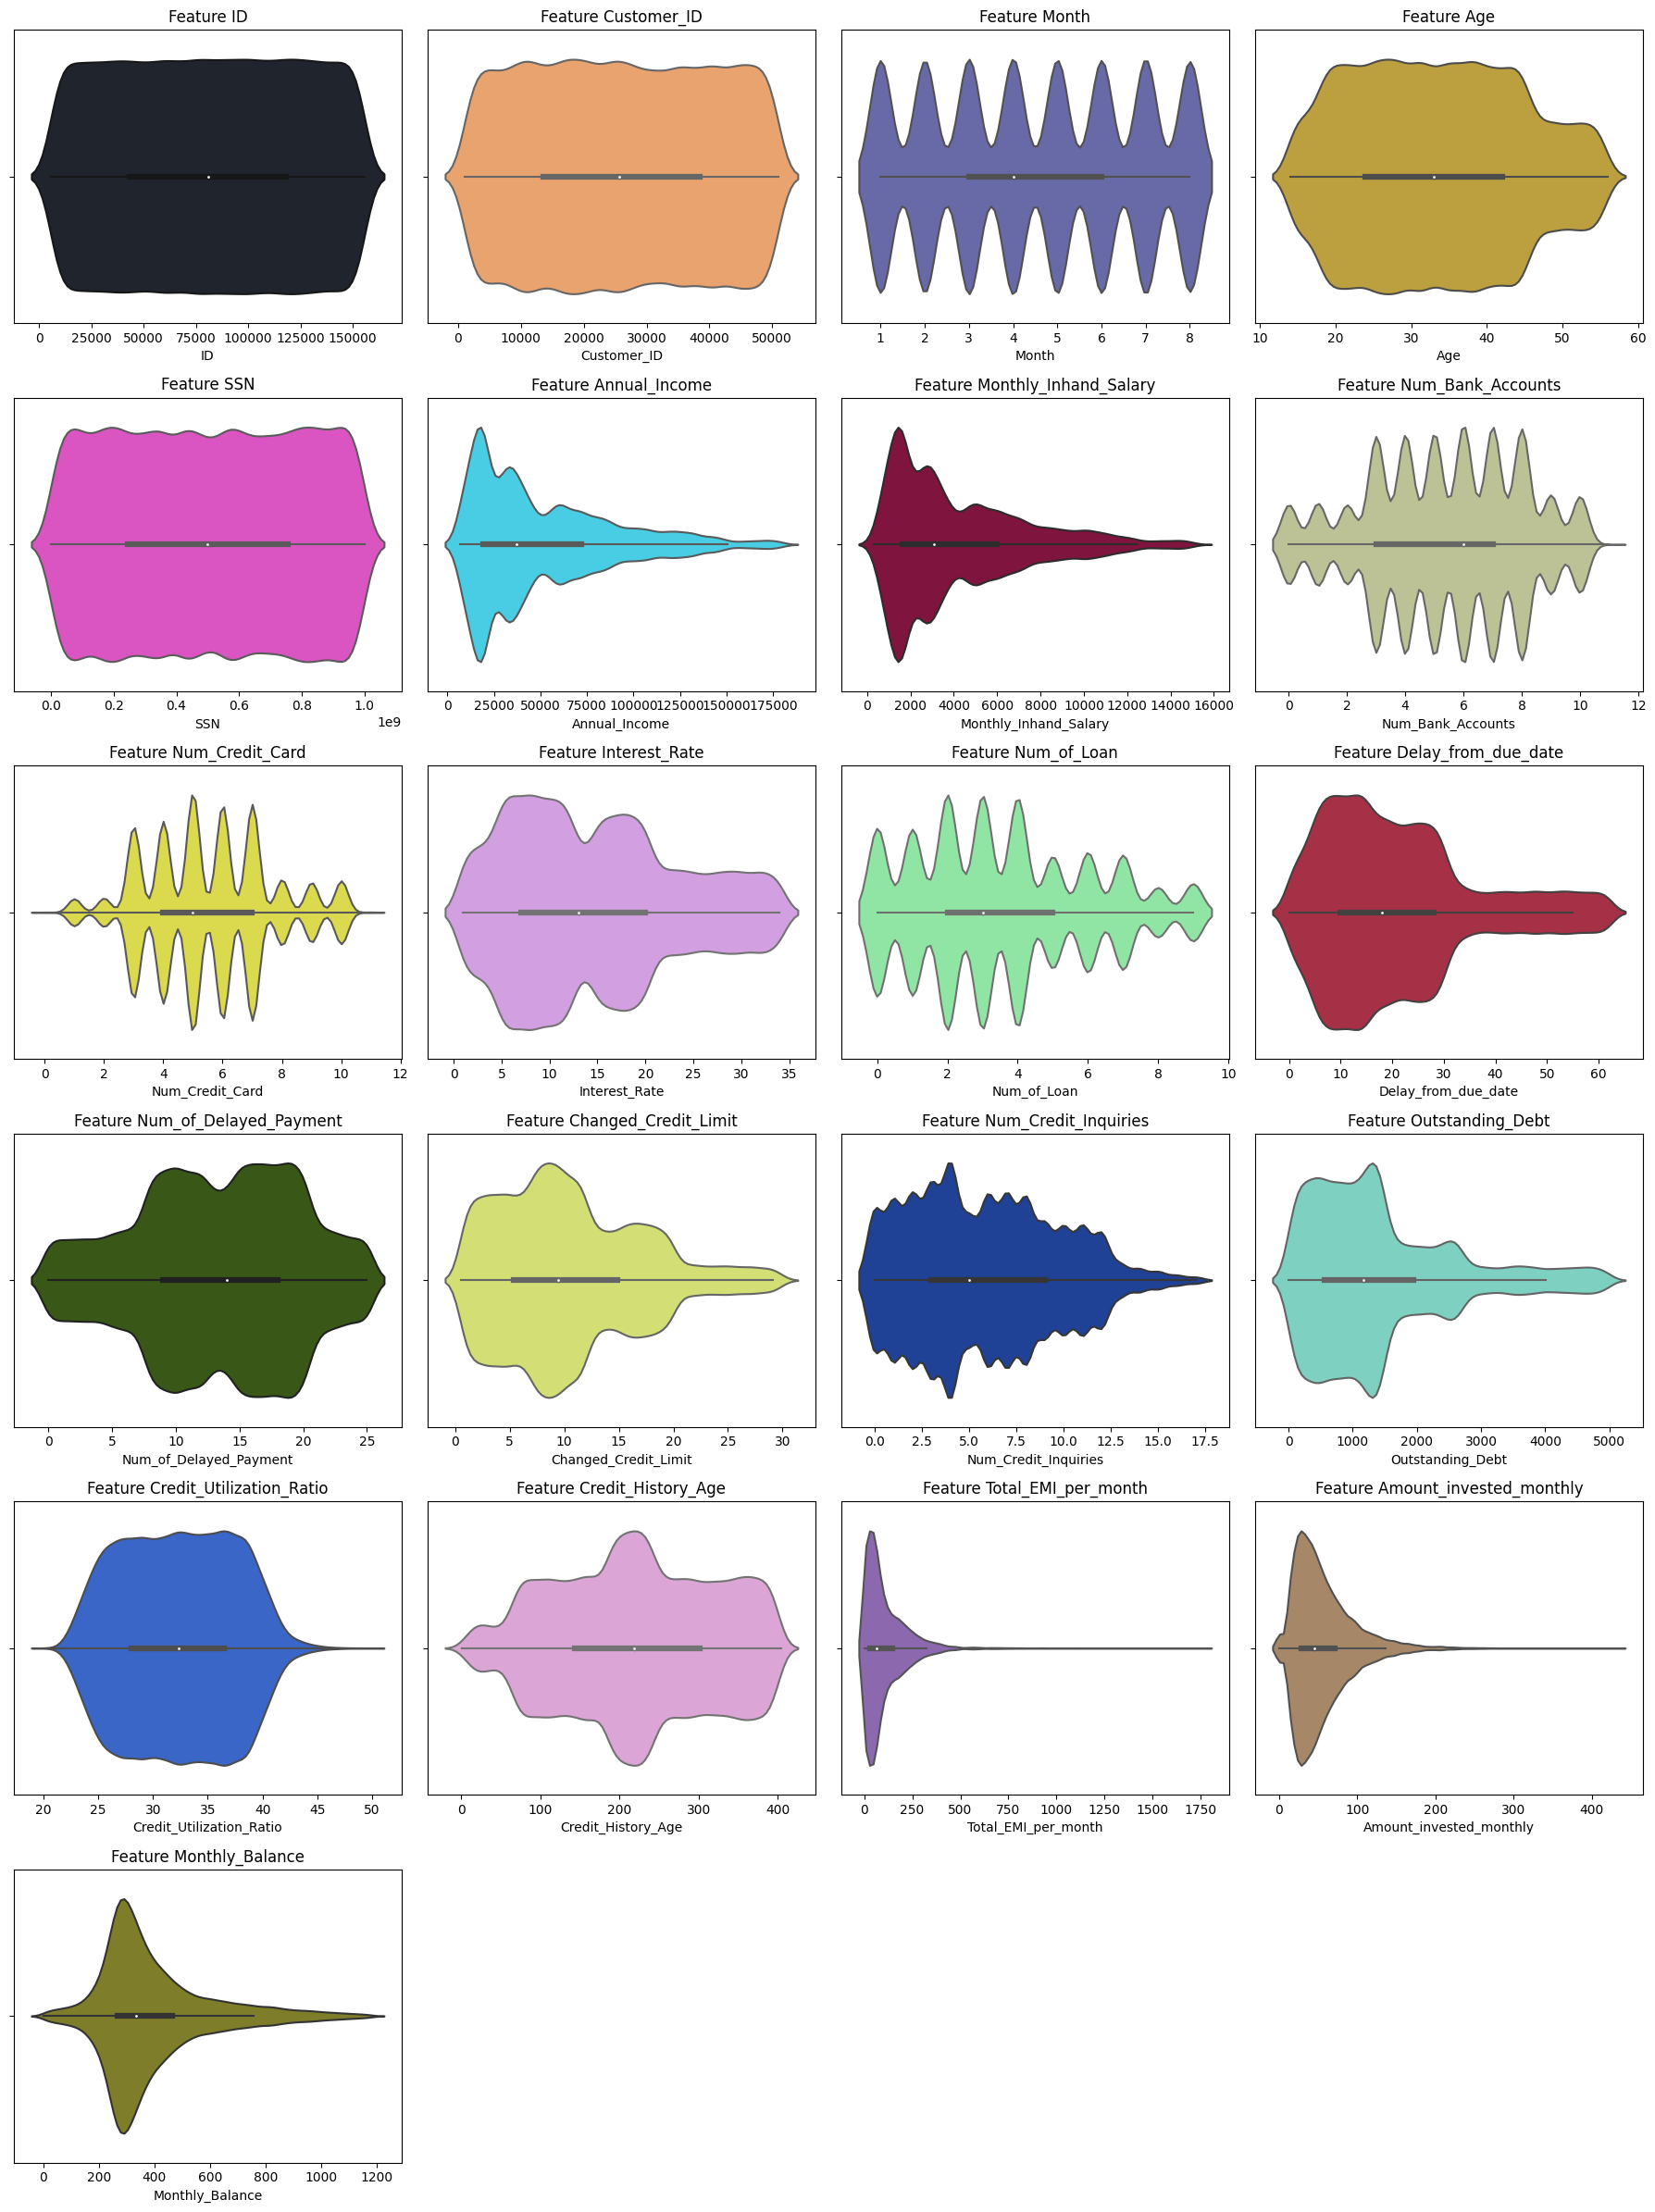

In [ ]:
import numpy as np


num_vars = train_df.select_dtypes(include=['number'])

num_features = len(num_vars.columns)
num_rows = (num_features - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(18, 4 * num_rows), sharey=True)

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=train_df[feature], ax=axes[i], color=np.random.rand(3,))
    axes[i].set_title(f'Feature {feature}')

# Hide unused subplots
for j in range(num_features, num_rows * 4):
    fig.delaxes(axes[j])


plt.tight_layout()

plt.show()

In [ ]:
train_df[train_df['Age'] < 15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
128,142501,44713,8,Ryan Vlastelicaa,14.0,964343476.0,Engineer,16236.13,1142.010833,7.0,...,Bad,3300.77,31.927096,167.0,Yes,66.560642,27.370787,Low_spent_Small_value_payments,190.920481,Standard
152,142895,26774,6,Chestneye,14.0,975479681.0,Media_Manager,31896.70,2832.058333,7.0,...,Standard,1941.65,31.956582,234.0,Yes,36.331742,43.673750,Low_spent_Small_value_payments,319.229895,Poor
234,149995,35622,2,Atossao,14.0,54742220.0,Architect,30228.82,2406.068333,8.0,...,Bad,1430.80,32.074774,152.0,Yes,131.560713,41.733670,High_spent_Large_value_payments,300.728744,Poor
286,96250,16786,5,Maltezouu,14.0,589127572.0,Engineer,16697.83,1662.485833,10.0,...,Standard,2514.35,38.825124,138.0,NM,67.601152,31.000650,Low_spent_Small_value_payments,187.996323,Standard
370,131568,26144,7,Douwe Miedemal,14.0,771234071.0,Manager,61922.24,5418.186667,6.0,...,Bad,4678.77,32.298336,46.0,Yes,336.014863,90.147314,Low_spent_Small_value_payments,238.048493,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69598,151593,17106,4,Whitey,14.0,115725613.0,Lawyer,39011.12,3014.926667,8.0,...,Bad,1714.75,30.709268,233.0,Yes,135.108186,44.607110,Low_spent_Small_value_payments,166.291414,Poor
69639,142941,33641,4,Nickz,14.0,698914112.0,Manager,23646.08,1752.506667,4.0,...,Standard,1388.59,33.826892,160.0,Yes,108.835292,26.116457,High_spent_Medium_value_payments,253.575741,Good
69673,146947,29010,2,Costaf,14.0,399912074.0,Doctor,49716.16,3925.013333,4.0,...,Standard,1490.78,28.926587,233.0,Yes,240.333158,46.546531,High_spent_Medium_value_payments,325.699755,Standard
69761,31305,42719,4,Phil Wahbag,14.0,279620890.0,Manager,75888.64,6620.053333,3.0,...,Standard,1149.63,39.065448,101.0,Yes,288.724094,57.666520,High_spent_Large_value_payments,485.559588,Good


In [ ]:
train_df[(train_df['Age'] < 14) | (train_df['Age'] > 70)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


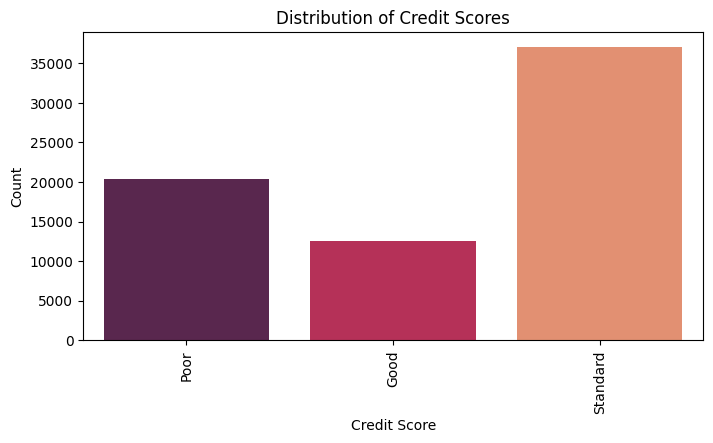

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Credit_Score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)
plt.show()

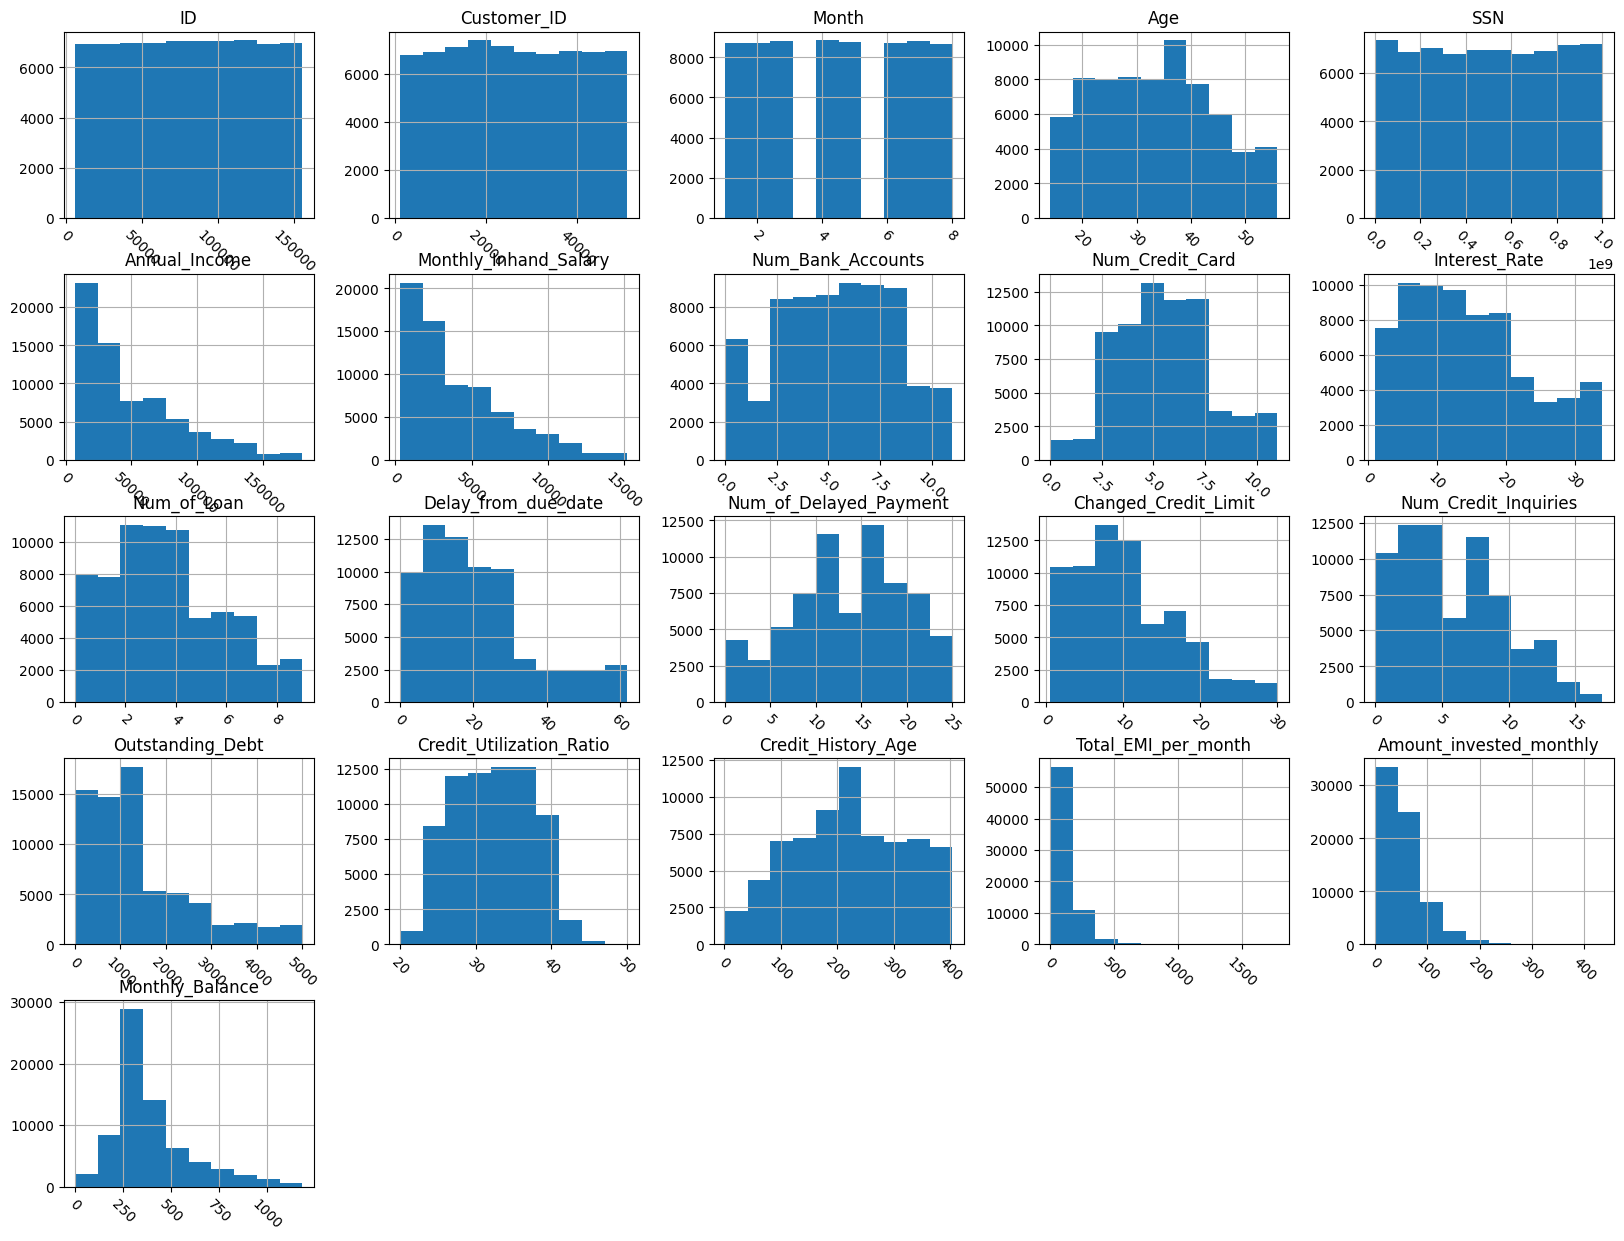

In [ ]:
train_df.hist(figsize=(20,15), xrot=-45)
plt.show()

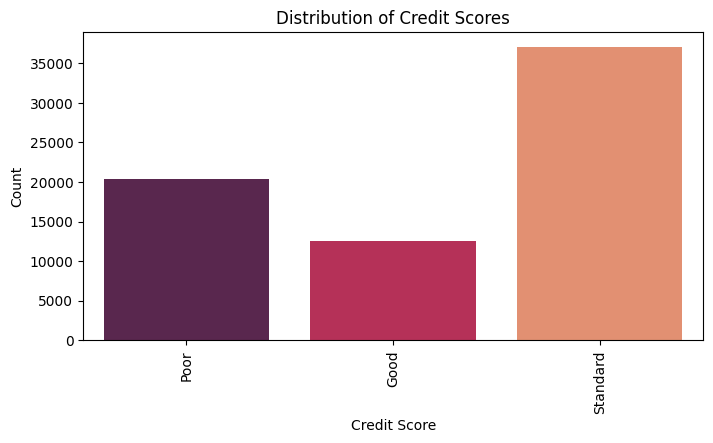

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='Credit_Score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_df['Age'].unique()

array([18., 21., 47., 41., 53., 30., 43., 16., 33., 32., 38., 26., 27.,
       45., 24., 25., 34., 29., 17., 22., 39., 23., 36., 56., 20., 28.,
       52., 19., 46., 15., 42., 35., 37., 31., 51., 54., 44., 49., 14.,
       50., 40., 55., 48.])

<Axes: xlabel='Age', ylabel='Density'>

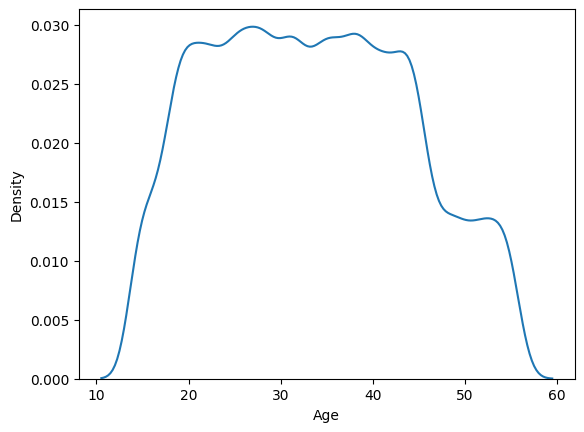

In [ ]:
sns.kdeplot(train_df['Age'])

# Feature Engineering

In [ ]:
def one_hot_encoding_loan_type(df):

        loan_types = df['Type_of_Loan'].str.split(',', expand=True)

        # Get all unique loan types
        unique_loan_types = loan_types.stack().unique()

        # Create a new DataFrame to store loan type counts
        loan_counts = pd.DataFrame(index=df.index)

        # Iterate over unique loan types and count occurrences
        for loan_type in unique_loan_types:
            loan_counts[loan_type] = loan_types.apply(lambda row: row.str.contains(loan_type).sum(), axis=1)

        # Display the DataFrame with loan type counts
        loan_counts = pd.DataFrame(loan_counts)

        df = pd.concat([df, loan_counts], axis=1)
        df = df.drop(columns=['No Data', 'not specified'])
        return df

train = one_hot_encoding_loan_type(train_df)
test = one_hot_encoding_loan_type(test_df)

In [ ]:
def previous_credit_score_features(train, test):
    # Create new columns for all the credit score that have been recorded for a specific customer up unitl now
    cr_score_df_train = train[['Customer_ID', 'Month', 'Credit_Score']].copy()
    cr_score_df_test = test[['Customer_ID', 'Month']].copy()
    # Add new columns for each months credit score
    def_cr_score_value = "Not Found"
    cr_score_df_train['Credit_Score_1'] = def_cr_score_value
    cr_score_df_train['Credit_Score_2'] = def_cr_score_value
    cr_score_df_train['Credit_Score_3'] = def_cr_score_value
    cr_score_df_train['Credit_Score_4'] = def_cr_score_value
    cr_score_df_train['Credit_Score_5'] = def_cr_score_value
    cr_score_df_train['Credit_Score_6'] = def_cr_score_value
    cr_score_df_train['Credit_Score_7'] = def_cr_score_value
    cr_score_df_train['Credit_Score_8'] = def_cr_score_value

    cr_score_df_test['Credit_Score_1'] = def_cr_score_value
    cr_score_df_test['Credit_Score_2'] = def_cr_score_value
    cr_score_df_test['Credit_Score_3'] = def_cr_score_value
    cr_score_df_test['Credit_Score_4'] = def_cr_score_value
    cr_score_df_test['Credit_Score_5'] = def_cr_score_value
    cr_score_df_test['Credit_Score_6'] = def_cr_score_value
    cr_score_df_test['Credit_Score_7'] = def_cr_score_value
    cr_score_df_test['Credit_Score_8'] = def_cr_score_value

    # Iterate over each customer id to find the credit score for each month
    for customer_id in cr_score_df_train['Customer_ID'].unique():
        # Get all the rows for the current customer
        customer_rows_train = cr_score_df_train[cr_score_df_train['Customer_ID'] == customer_id]
        customer_rows_test = cr_score_df_test[cr_score_df_test['Customer_ID'] == customer_id]

        # Get the number of rows for the current customer
        num_rows_train = len(customer_rows_train)
        num_rows_test = len(customer_rows_test)
        cs_by_month = {}
        # Based on the month in customer_rows, set the credit_score for that specific month in cr_score_df
        for i in range(num_rows_train):
            month = customer_rows_train.iloc[i]['Month']
            credit_score = customer_rows_train.iloc[i]['Credit_Score']
            cs_by_month[int(month)] = credit_score

        # For each customer_rows, set all Credit_Score_i
        for i in range(num_rows_train):
            month = customer_rows_train.iloc[i]['Month']
            for j in range(0, month):
                cr_score_df_train.at[customer_rows_train.index[i], 'Credit_Score_' + str(j+1)] = cs_by_month[j+1] if (j+1) in cs_by_month.keys() else def_cr_score_value

        for i in range(num_rows_test):
            month = customer_rows_test.iloc[i]['Month']
            for j in range(0, month):
                cr_score_df_test.at[customer_rows_test.index[i], 'Credit_Score_' + str(j+1)] = cs_by_month[j+1] if (j+1) in cs_by_month.keys() else def_cr_score_value

    # concat the new columns to the train dataframe
    train = pd.concat([train, cr_score_df_train[['Credit_Score_1', 'Credit_Score_2', 'Credit_Score_3', 'Credit_Score_4', 'Credit_Score_5', 'Credit_Score_6', 'Credit_Score_7', 'Credit_Score_8']]], axis=1)
    test = pd.concat([test, cr_score_df_test[['Credit_Score_1', 'Credit_Score_2', 'Credit_Score_3', 'Credit_Score_4', 'Credit_Score_5', 'Credit_Score_6', 'Credit_Score_7', 'Credit_Score_8']]], axis=1)

    return train, test


In [ ]:
train_fe, test_fe = previous_credit_score_features(train, test)

In [ ]:
train_fe.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,auto loan,debt consolidation loan,Credit_Score_1,Credit_Score_2,Credit_Score_3,Credit_Score_4,Credit_Score_5,Credit_Score_6,Credit_Score_7,Credit_Score_8
0,84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,...,0,0,Not Found,Not Found,Poor,Poor,Poor,Not Found,Not Found,Not Found
1,46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,...,0,0,Poor,Not Found,Not Found,Poor,Poor,Not Found,Not Found,Not Found
2,147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,...,0,0,Standard,Not Found,Standard,Good,Good,Not Found,Not Found,Not Found
3,16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,...,0,0,Standard,Standard,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
4,84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,...,1,0,Standard,Standard,Standard,Not Found,Not Found,Not Found,Not Found,Not Found


In [ ]:
print(test_fe.shape)
print(test.shape)

(30000, 43)
(30000, 35)


In [ ]:
print(train_fe.isna().sum())
print(test_fe.isna().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
payday loan                 0
mortgage loan               0
student loan                0
home equity loan            0
credit-builder loan         0
personal l

In [ ]:
def avg_credit_score_features(train, test):
    # Create new columns for all the credit score that have been recorded for a specific customer up unitl now
    cr_score_df_train = train[['Customer_ID', 'Month', 'Credit_Score']].copy()
    cr_score_df_test = test[['Customer_ID', 'Month']].copy()
    # Add new columns for each months credit score
    cr_score_df_train['Credit_Score_avg'] = 1

    cr_score_df_test['Credit_Score_avg'] = 1

    # Iterate over each customer id to find the credit score for each month
    for customer_id in cr_score_df_train['Customer_ID'].unique():
        # Get all the rows for the current customer
        customer_rows_train = cr_score_df_train[cr_score_df_train['Customer_ID'] == customer_id]
        customer_rows_test = cr_score_df_test[cr_score_df_test['Customer_ID'] == customer_id]

        # Get the number of rows for the current customer
        num_rows_train = len(customer_rows_train)
        num_rows_test = len(customer_rows_test)
        cs_by_month = {}
        # Based on the month in customer_rows, set the credit_score for that specific month in cr_score_df
        for i in range(num_rows_train):
            month = customer_rows_train.iloc[i]['Month']
            credit_score = customer_rows_train.iloc[i]['Credit_Score']
            cs_by_month[int(month)] = int(credit_score)

        for i in range(num_rows_train):
            month = int(customer_rows_train.iloc[i]['Month'])
            cr_avg = 0
            count = 0
            for j in range(0, month):
                cr_avg += cs_by_month[j+1] if (j+1) in cs_by_month.keys() else 0
                count += 1 if (j+1) in cs_by_month.keys() else 0
            cr_score_df_train.at[customer_rows_train.index[i], 'Credit_Score_avg'] = cr_avg/count if count != 0 else 1

        for i in range(num_rows_test):
            month = int(customer_rows_test.iloc[i]['Month'])
            for j in range(0, month):
                cr_avg += cs_by_month[j+1] if (j+1) in cs_by_month.keys() else 0
                count += 1 if (j+1) in cs_by_month.keys() else 0
            cr_score_df_test.at[customer_rows_test.index[i], 'Credit_Score_avg'] = cr_avg/count if count != 0 else 1

    # concat the new columns to the train dataframe
    train = pd.concat([train, cr_score_df_train[['Credit_Score_avg']]], axis=1)
    test = pd.concat([test, cr_score_df_test[['Credit_Score_avg']]], axis=1)

    return train, test

In [ ]:
def credit_score_encode(train, test):
    #Encode rest of variables
    def_cr_score_value = "Not Found"
    desired_categories = [['Good', 'Standard', 'Poor', def_cr_score_value]]
    feature_encoder = OrdinalEncoder(categories = desired_categories)
    y_train = feature_encoder.fit_transform(train[['Credit_Score']]).ravel()
    train['Credit_Score'] = feature_encoder.fit_transform(train[['Credit_Score']]).ravel()
    for i in range(1,9):
        train['Credit_Score_'+str(i)] = feature_encoder.fit_transform(train[['Credit_Score_'+str(i)]])
        test['Credit_Score_'+str(i)] = feature_encoder.fit_transform(test[['Credit_Score_'+str(i)]])

    train, test = avg_credit_score_features(train, test)

    return train, test, y_train, feature_encoder

In [ ]:
def credit_mix_encode(train, test):
    desired_categories_2 = ['Good', 'Standard', 'Bad']
    feature_encoder_2 = OrdinalEncoder(categories = [desired_categories_2])
    train[ 'Credit_Mix'] = feature_encoder_2.fit_transform(train[ 'Credit_Mix'].values.reshape(-1, 1))
    test[ 'Credit_Mix'] = feature_encoder_2.fit_transform(test[ 'Credit_Mix'].values.reshape(-1, 1))

    return train, test

In [ ]:
def ordinal_encode_occupation(train, test):
    #Occupation ranked from highest to lowest annual income on all data
    desired_categories_3 = ['Musician', 'Writer', 'Manager', 'Architect' , 'Scientist', 'Entrepreneur', 'Media_Manager', 'Accountant',\
                             'Engineer', 'Developer', 'Mechanic', 'Teacher', 'Doctor' ,'Lawyer', 'Journalist']
    feature_encoder_3 = OrdinalEncoder(categories = [desired_categories_3])
    train['Occupation'] = feature_encoder_3.fit_transform(train['Occupation'].values.reshape(-1, 1))
    test['Occupation'] = feature_encoder_3.fit_transform(test['Occupation'].values.reshape(-1, 1))

    return train, test

In [ ]:
def label_encode_payment_behaviour(train, test, label_encoder):
    train['Payment_Behaviour'] = label_encoder.fit_transform(train['Payment_Behaviour'])
    test[ 'Payment_Behaviour'] = label_encoder.fit_transform(test[ 'Payment_Behaviour'])

    return train, test

In [ ]:
def label_encode_payment_of_min_amt(train, test, label_encoder):
    train['Payment_of_Min_Amount'] = label_encoder.fit_transform(train['Payment_of_Min_Amount'])
    test[ 'Payment_of_Min_Amount'] = label_encoder.fit_transform(test[ 'Payment_of_Min_Amount'])

    return train, test

In [ ]:
def normalize(X_train, X_test):
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train_scaled_df, X_test_scaled_df

In [ ]:
def preprocess(train, test):

    #Drop unnecessary columns : Customer_id, Name, SSN,
    train_data_filter = train.drop(columns=["Name", 'SSN','Type_of_Loan'])
    test_data_filter = test.drop(columns=["Name", 'SSN', 'Type_of_Loan' ])

    #Adding feature interaction:
    train_data_filter['income_age'] = train_data_filter['Annual_Income']*train_data_filter['Age']
    test_data_filter['income_age'] = test_data_filter['Annual_Income']*test_data_filter['Age']

    test_data_filter['card_bank'] = test_data_filter['Num_Bank_Accounts']*test_data_filter['Num_Credit_Card']
    train_data_filter['card_bank'] = train_data_filter['Num_Bank_Accounts']*train_data_filter['Num_Credit_Card']

    train_data_filter['DTI_ratio'] = (train_data_filter['Outstanding_Debt']/train_data_filter['Annual_Income'])*100
    test_data_filter['DTI_ratio'] = (test_data_filter['Outstanding_Debt']/test_data_filter['Annual_Income'])*100

    train_data_filter['ITS_ratio'] = (train_data_filter['Amount_invested_monthly']/train_data_filter['Monthly_Inhand_Salary'])*100
    test_data_filter['ITS_ratio'] = (test_data_filter['Amount_invested_monthly']/test_data_filter['Monthly_Inhand_Salary'])*100

    train_data_filter['Instalments_to_Salary'] = ((train_data_filter['Total_EMI_per_month']*12)/train_data_filter['Annual_Income'])*100
    test_data_filter['Instalments_to_Salary'] = ((test_data_filter['Total_EMI_per_month']*12)/test_data_filter['Annual_Income'])*100

    train_data_filter['Debt_over_time'] = ((train_data_filter['Outstanding_Debt'])/train_data_filter['Credit_History_Age'])
    test_data_filter['Debt_over_time'] = ((test_data_filter['Outstanding_Debt'])/test_data_filter['Credit_History_Age'])

    train_data_filter['Interest_Debt'] = ((train_data_filter['Interest_Rate']/100)*train_data_filter['Outstanding_Debt'])
    test_data_filter['Interest_Debt'] = ((test_data_filter['Interest_Rate']/100)*test_data_filter['Outstanding_Debt'])

    train_data_filter['Interest_time'] = ((train_data_filter['Interest_Rate'])/train_data_filter['Credit_History_Age'])
    test_data_filter['Interest_time'] = ((test_data_filter['Interest_Rate'])/test_data_filter['Credit_History_Age'])

    train_data_filter, test_data_filter, y_train, feature_encoder = credit_score_encode(train_data_filter, test_data_filter)

    train_data_filter, test_data_filter = credit_mix_encode(train_data_filter, test_data_filter)

    train_data_filter, test_data_filter = ordinal_encode_occupation(train_data_filter, test_data_filter)

    label_encoder = LabelEncoder()

    train_data_filter, test_data_filter = label_encode_payment_behaviour(train_data_filter, test_data_filter, label_encoder)
    train_data_filter, test_data_filter = label_encode_payment_of_min_amt(train_data_filter, test_data_filter, label_encoder)

    #Define X_train, X_test
    X_train = train_data_filter.drop(columns = 'Credit_Score' )
    X_test = test_data_filter
    X_test = X_test[X_train.columns]

    X_train, X_test= normalize(X_train, X_test)

    return X_train, y_train, X_test, feature_encoder


In [ ]:
X_train, y_train, X_test, feature_encoder = preprocess(train_fe, test_fe)

In [ ]:
model = RandomForestClassifier(criterion = 'log_loss',random_state=0, n_jobs=  -1)
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores.mean()}')

These are the cross validation scores 0.9945857142857143


In [ ]:
RF = make_pipeline(RandomForestClassifier(criterion = 'log_loss',random_state=0, n_jobs=-1, min_samples_split=5, min_samples_leaf=4, max_depth=10))
RF.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_jobs=-1, random_state=0))])

In [ ]:
X_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'payday loan', 'mortgage loan', 'student loan', 'home equity loan',
       'credit-builder loan', 'personal loan', 'auto loan',
       'debt consolidation loan', 'Credit_Score_1', 'Credit_Score_2',
       'Credit_Score_3', 'Credit_Score_4', 'Credit_Score_5', 'Credit_Score_6',
       'Credit_Score_7', 'Credit_Score_8', 'income_age', 'card_bank',
       'DTI_ratio', 'ITS_ratio', 'Instalments_to_Salary', 'Debt_over_time',
       'Interest_Debt', 'Interest_time', 'Credit_Scor

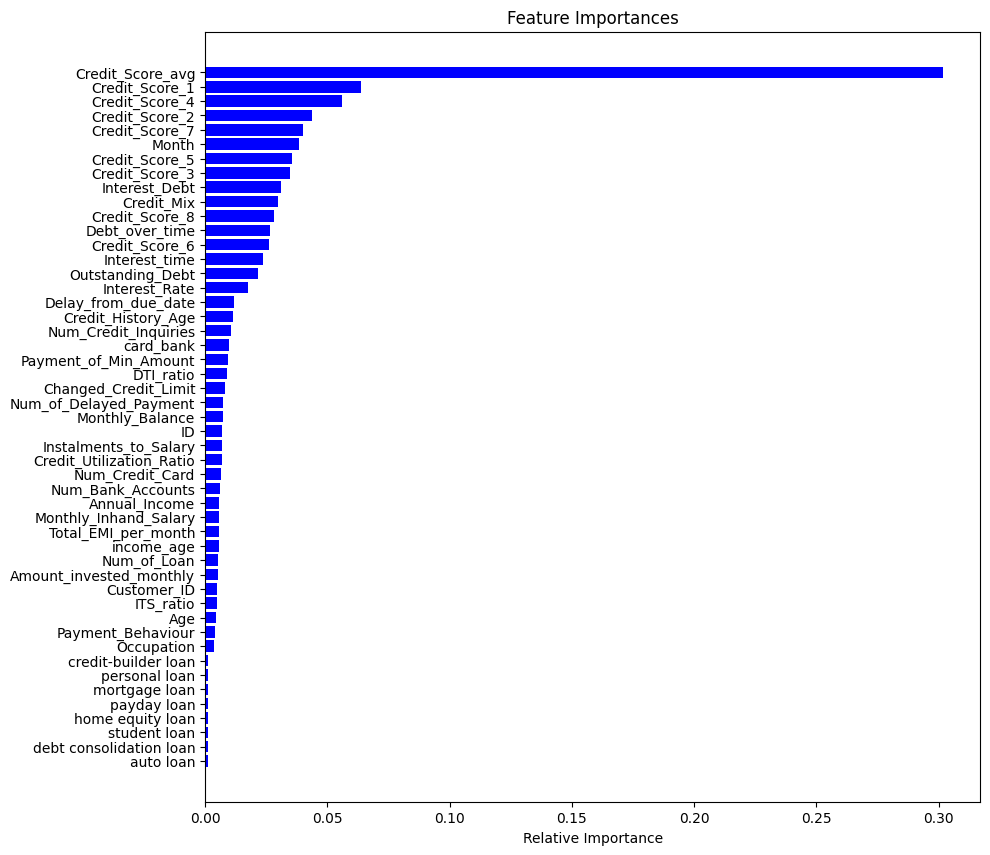

In [ ]:
# plot and print the important features
features = X_train.columns
importances = RF.steps[0][1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print(X_train.columns[np.argsort(RF.steps[0][1].feature_importances_)[::-1]])
print(X_train.columns[RF.steps[0][1].feature_importances_ > 0.01])

Index(['Credit_Score_avg', 'Credit_Score_1', 'Credit_Score_4',
       'Credit_Score_2', 'Credit_Score_7', 'Month', 'Credit_Score_5',
       'Credit_Score_3', 'Interest_Debt', 'Credit_Mix', 'Credit_Score_8',
       'Debt_over_time', 'Credit_Score_6', 'Interest_time', 'Outstanding_Debt',
       'Interest_Rate', 'Delay_from_due_date', 'Credit_History_Age',
       'Num_Credit_Inquiries', 'card_bank', 'Payment_of_Min_Amount',
       'DTI_ratio', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment',
       'Monthly_Balance', 'ID', 'Instalments_to_Salary',
       'Credit_Utilization_Ratio', 'Num_Credit_Card', 'Num_Bank_Accounts',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Total_EMI_per_month',
       'income_age', 'Num_of_Loan', 'Amount_invested_monthly', 'Customer_ID',
       'ITS_ratio', 'Age', 'Payment_Behaviour', 'Occupation',
       'credit-builder loan', 'personal loan', 'mortgage loan', 'payday loan',
       'home equity loan', 'student loan', 'debt consolidation loan',
       'auto

In [ ]:
selected_cols = ['Debt_over_time', 'Interest_Debt', 'Interest_time', 'Credit_Score_avg',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
        'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries']
X_train_selected = X_train[selected_cols]

RF = make_pipeline(RandomForestClassifier(criterion = 'log_loss',random_state=0, n_jobs=-1, min_samples_split=5, min_samples_leaf=4, max_depth=10, n_estimators=1000))
RF.fit(X_train_selected, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=10,
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=1000, n_jobs=-1,
                                        random_state=0))])

In [ ]:
X_test_selected = X_test[selected_cols]
X_test_selected.isna().sum()

Debt_over_time          0
Interest_Debt           0
Interest_time           0
Credit_Score_avg        0
Credit_Mix              0
Outstanding_Debt        0
Credit_History_Age      0
Interest_Rate           0
Delay_from_due_date     0
Num_Credit_Inquiries    0
dtype: int64

In [ ]:
preds = RF.predict(X_test_selected)

In [ ]:
# inverse_transform the labels and add to X_test
pred_df = pd.DataFrame()
pred_df['ID'] = test_df['ID']
pred_df['Credit_Score'] = feature_encoder.inverse_transform(preds.reshape(-1, 1))

In [ ]:
pred_df.to_csv('/content/sandbox_submission.csv', index=False)